In [69]:
from analysis_utils import get_combined_data
usd_name = 'BUSD'
token_name='BTC'
symbol = token_name + usd_name

init_data = get_combined_data(symbol, 'ksol_0_0_0', 1646229060000, 1658229059999)

In [70]:
df = init_data.copy()
df[10000:].head(10)

,open_time,open,high,low,close,volume,close_time,quote_assert_volume,number_of_trades,taker_buy_volume,taker_buy_quote_asset_volume,TR,last_top,step_after_top,last_bottom,step_after_bottom,is_up,cycle_step,buy_price,sell_price
10000,1.646829e+12,42314.7,42321.7,42294.7,42294.7,40.473,1.646829e+12,1.712541e+06,445.0,11.702,4.951460e+05,27.0,42372.6,85.0,42022.5,54.0,1.0,31.0,NaN,NaN
10001,1.646829e+12,42294.8,42312.7,42289.2,42302.4,12.364,1.646829e+12,5.230263e+05,328.0,9.740,4.120236e+05,23.5,42372.6,86.0,42022.5,55.0,1.0,31.0,NaN,NaN
10002,1.646829e+12,42302.4,42321.7,42295.0,42321.7,10.446,1.646829e+12,4.419470e+05,284.0,7.367,3.116978e+05,26.7,42372.6,87.0,42022.5,56.0,1.0,31.0,NaN,NaN
10003,1.646829e+12,42321.7,42348.0,42321.7,42339.9,5.865,1.646829e+12,2.483192e+05,243.0,3.291,1.393333e+05,26.3,42372.6,88.0,42022.5,57.0,1.0,31.0,NaN,NaN
10004,1.646829e+12,42339.9,42592.0,42334.2,42406.2,152.364,1.646829e+12,6.470762e+06,2863.0,89.002,3.778830e+06,257.8,42372.6,89.0,42022.5,58.0,1.0,31.0,42372.6,NaN
10005,1.646829e+12,42404.0,42404.0,42132.6,42207.9,130.359,1.646829e+12,5.508871e+06,2234.0,48.673,2.056846e+06,271.4,42372.6,90.0,42022.5,59.0,1.0,31.0,42372.6,NaN
10006,1.646829e+12,42207.9,42208.0,42114.6,42141.4,58.851,1.646829e+12,2.481280e+06,1362.0,17.861,7.530330e+05,93.4,42372.6,91.0,42022.5,60.0,1.0,31.0,NaN,NaN
10007,1.646829e+12,42141.4,42141.4,42035.7,42074.3,161.590,1.646830e+12,6.801166e+06,1940.0,65.959,2.776483e+06,105.7,42592.0,3.0,42022.5,61.0,0.0,58.0,NaN,NaN
10008,1.646830e+12,42072.1,42099.9,42037.8,42089.5,43.610,1.646830e+12,1.834877e+06,810.0,24.285,1.021787e+06,62.1,42592.0,4.0,42022.5,62.0,0.0,58.0,NaN,NaN
10009,1.646830e+12,42090.0,42111.9,42062.1,42062.2,37.544,1.646830e+12,1.580665e+06,556.0,12.541,5.279469e+05,49.8,42592.0,5.0,42022.5,63.0,0.0,58.0,NaN,NaN


In [71]:
df.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_assert_volume', 'number_of_trades', 'taker_buy_volume',
       'taker_buy_quote_asset_volume', 'TR', 'last_top', 'step_after_top',
       'last_bottom', 'step_after_bottom', 'is_up', 'cycle_step', 'buy_price',
       'sell_price'],
      dtype='object')

Get the future info

In [72]:
import numpy as np
import pandas as pd

last_sell_price = np.nan
last_buy_price = np.nan

next_top = np.nan
next_bottom = np.nan
curr_top = np.nan
curr_bottom = np.nan

def get_future_info(x):
    global last_sell_price, last_buy_price

    if not pd.isna(x['sell_price']):
        last_sell_price = x['sell_price']

    if not pd.isna(x['buy_price']):
        last_buy_price = x['buy_price']

    global next_top, next_bottom, curr_top, curr_bottom

    if x['last_top'] != curr_top:
        next_top = curr_top
        curr_top = x['last_top']

    if x['last_bottom'] != curr_bottom:
        next_bottom = curr_bottom
        curr_bottom = x['last_bottom']

    return last_buy_price, last_sell_price, max(x['high'], next_top), min(x['low'], next_bottom)

df[['target_buy_price', 'target_sell_price', 'next_top', 'next_bottom']] = df.iloc[::-1].apply(
    lambda x: get_future_info(x), axis=1, result_type="expand").iloc[::-1]

df.head()

,open_time,open,high,low,close,volume,close_time,quote_assert_volume,number_of_trades,taker_buy_volume,...,last_bottom,step_after_bottom,is_up,cycle_step,buy_price,sell_price,target_buy_price,target_sell_price,next_top,next_bottom
0,1.646229e+12,43540.7,43540.7,43512.5,43516.4,11.056,1.646229e+12,481250.0731,414.0,3.620,...,NaN,NaN,0.0,NaN,NaN,NaN,43762.8,44212.1,43540.7,43512.5
1,1.646229e+12,43516.3,43532.6,43501.0,43502.8,12.379,1.646229e+12,538668.5026,380.0,5.189,...,NaN,NaN,0.0,NaN,NaN,NaN,43762.8,44212.1,43532.6,43501.0
2,1.646229e+12,43502.5,43540.1,43487.5,43503.5,16.426,1.646229e+12,714832.4526,540.0,7.254,...,NaN,NaN,0.0,NaN,NaN,NaN,43762.8,44212.1,43540.1,43487.5
3,1.646229e+12,43503.5,43527.6,43494.4,43527.6,9.403,1.646229e+12,409096.2926,333.0,4.739,...,NaN,NaN,0.0,NaN,NaN,NaN,43762.8,44212.1,43527.6,43494.4
4,1.646229e+12,43529.0,43529.0,43460.1,43506.2,15.565,1.646229e+12,676800.0783,584.0,7.863,...,NaN,NaN,0.0,NaN,NaN,NaN,43762.8,44212.1,43529.0,43460.1


# Target

In [103]:
# Time of the saving earn is one step ahead the true buy/sell time

target_name = 'price_100_after'
# target_name = 'earn_if_buy'

df['earn_if_buy'] = df['target_sell_price'].shift(-1) - df['buy_price']
df['price_100_after'] = df['close'].shift(-100)
df['earn_if_sell'] = df['sell_price'] - df['target_buy_price'].shift(-1)

In [74]:
df[~pd.isna(df['buy_price'])][[
    'last_top', 'last_bottom', 'buy_price', 'target_buy_price', 'earn_if_buy', 'earn_if_sell', 'next_top', 'next_bottom']].head(30)

,last_top,last_bottom,buy_price,target_buy_price,earn_if_buy,earn_if_sell,next_top,next_bottom
354,43762.8,43437.4,43762.8,43762.8,124.2,NaN,43825.8,43687.6
359,43762.8,43437.4,43762.8,43762.8,124.2,NaN,43825.8,43687.6
360,43762.8,43437.4,43762.8,43762.8,124.2,NaN,43825.8,43687.6
361,43762.8,43437.4,43762.8,43762.8,124.2,NaN,43825.8,43687.6
403,43825.8,43687.6,43825.8,43825.8,61.2,NaN,43898.6,43760.5
404,43825.8,43687.6,43825.8,43825.8,61.2,NaN,43898.6,43760.5
414,43825.8,43687.6,43825.8,43825.8,61.2,NaN,43898.6,43760.5
418,43825.8,43687.6,43825.8,43825.8,61.2,NaN,43898.6,43760.5
419,43825.8,43687.6,43825.8,43825.8,61.2,NaN,43898.6,43760.5
420,43825.8,43687.6,43825.8,43825.8,61.2,NaN,43898.6,43760.5


# Add feature

In [75]:
new_ave_of_base = {
    'MA': 'close',
    'ATR': 'TR',
    'AQAV': 'quote_assert_volume',
    'AT': 'number_of_trades',
    'ATBQAV': 'taker_buy_quote_asset_volume',
    'ACS': 'cycle_step'
    }
cycles = [4, 256]
for ave in new_ave_of_base:
    for cc in cycles:
        name = ave + str(cc)
        df[name] = df[new_ave_of_base[ave]].rolling(cc).mean()
        df[name + '_k'] = df[name] - df[name].shift(1)

df.tail(10)

,open_time,open,high,low,close,volume,close_time,quote_assert_volume,number_of_trades,taker_buy_volume,...,AT256,AT256_k,ATBQAV4,ATBQAV4_k,ATBQAV256,ATBQAV256_k,ACS4,ACS4_k,ACS256,ACS256_k
199990,1.658228e+12,22000.1,22007.8,21977.8,21977.8,43.355,1.658229e+12,9.536830e+05,510.0,13.841,...,742.250000,-4.835938,355290.208050,-44056.340350,854448.905691,-12320.356118,56.0,0.0,46.937500,0.136719
199991,1.658229e+12,21977.9,21992.1,21968.5,21968.6,51.141,1.658229e+12,1.124041e+06,575.0,13.711,...,720.714844,-21.535156,333243.770775,-22046.437275,823830.730388,-30618.175303,56.0,0.0,47.074219,0.136719
199992,1.658229e+12,21968.6,21994.0,21968.6,21988.4,47.282,1.658229e+12,1.039419e+06,446.0,28.938,...,705.214844,-15.500000,423599.937325,90356.166550,797421.374758,-26409.355630,56.0,0.0,47.210938,0.136719
199993,1.658229e+12,21988.5,21988.6,21979.6,21987.4,24.870,1.658229e+12,5.467337e+05,305.0,16.766,...,694.023438,-11.191406,402644.981000,-20954.956325,777930.958555,-19490.416203,56.0,0.0,47.347656,0.136719
199994,1.658229e+12,21987.5,21987.5,21970.4,21972.5,22.142,1.658229e+12,4.866162e+05,310.0,1.785,...,682.472656,-11.550781,336318.752775,-66326.228225,756726.507646,-21204.450909,56.0,0.0,47.484375,0.136719
199995,1.658229e+12,21972.5,22006.9,21972.5,22002.0,48.459,1.658229e+12,1.065755e+06,526.0,31.333,...,676.453125,-6.019531,433230.148175,96911.395400,747696.146615,-9030.361032,56.0,0.0,47.621094,0.136719
199996,1.658229e+12,22002.1,22032.9,21992.8,22022.5,79.150,1.658229e+12,1.742416e+06,797.0,55.968,...,673.242188,-3.210938,582225.981350,148995.833175,744559.084494,-3137.062121,56.0,0.0,47.757812,0.136719
199997,1.658229e+12,22024.0,22025.9,22000.0,22007.4,43.500,1.658229e+12,9.575751e+05,637.0,21.357,...,667.902344,-5.339844,607635.368975,25409.387625,736218.921790,-8340.162704,56.0,0.0,47.910156,0.152344
199998,1.658229e+12,22007.4,22034.8,22007.3,22023.7,55.508,1.658229e+12,1.222201e+06,573.0,41.976,...,664.042969,-3.859375,828865.612075,221230.243100,728369.594125,-7849.327665,56.0,0.0,48.062500,0.152344
199999,1.658229e+12,22023.7,22030.1,22023.7,22029.8,15.744,1.658229e+12,3.468109e+05,250.0,10.674,...,660.933594,-3.109375,715392.272825,-113473.339250,724406.334131,-3963.259994,56.0,0.0,48.214844,0.152344


# Get full data

In [100]:
# Get the data of one step before buy
# full_buy = df[pd.isna(df['buy_price']) & (~pd.isna(df['buy_price'].shift(-1)))].copy()
# full_buy['earn_if_buy'] = df.loc[full_buy.index+1, 'earn_if_buy'].data
# full_buy['earn_if_buy']

# Get the data of first buy
# full_buy = df[pd.isna(df['buy_price'].shift(1)) & (~pd.isna(df['buy_price']))].copy()

# Get all data, only when target is not earn if buy
full_buy = df.copy()
full_buy.drop(['earn_if_buy'], axis=1, inplace=True)

full_buy.drop(['open_time', 'close_time', 'volume', 'taker_buy_volume', 'buy_price', 'sell_price', 
    'target_buy_price', 'target_sell_price', 'earn_if_sell'], axis=1, inplace=True)
full_buy.dropna(axis=0, how='any', inplace=True)
full_buy.head(10)

,open,high,low,close,quote_assert_volume,number_of_trades,taker_buy_quote_asset_volume,TR,last_top,step_after_top,...,AT256_k,ATBQAV4,ATBQAV4_k,ATBQAV256,ATBQAV256_k,ACS4,ACS4_k,ACS256,ACS256_k,price_100_after
329,43639.6,43665.2,43639.6,43652.0,5.263747e+05,214.0,3.248495e+05,25.6,43762.8,12.0,...,-8.800781,144479.354625,14391.326950,672334.366730,-6752.209793,19.0,0.0,24.132812,-0.167969,43789.9
330,43651.9,43651.9,43563.7,43563.7,1.107371e+06,573.0,3.069327e+05,88.2,43762.8,13.0,...,-4.562500,196338.733475,51859.378850,667584.536377,-4749.830353,19.0,0.0,23.964844,-0.167969,43793.9
331,43563.7,43575.5,43480.0,43572.8,2.668563e+06,1276.0,1.120704e+06,95.5,43762.8,14.0,...,-1.925781,464866.674400,268527.940925,665391.792836,-2192.743541,19.0,0.0,23.796875,-0.167969,43782.6
332,43572.8,43605.0,43569.3,43569.3,7.240191e+05,375.0,4.047936e+05,35.7,43762.8,15.0,...,-24.195312,539319.953250,74453.278850,647567.081327,-17824.711508,19.0,0.0,23.628906,-0.167969,43783.8
333,43569.3,43569.3,43529.2,43542.7,4.655410e+05,272.0,1.971712e+05,40.1,43762.8,16.0,...,-31.753906,507400.388900,-31919.564350,618580.027710,-28987.053617,19.0,0.0,23.460938,-0.167969,43775.0
334,43542.7,43564.8,43486.6,43495.2,9.694753e+05,609.0,5.190495e+05,78.2,43762.8,17.0,...,-10.886719,560429.607925,53029.219025,609724.198938,-8855.828773,19.0,0.0,23.292969,-0.167969,43776.6
335,43495.2,43537.6,43495.2,43516.6,4.986807e+05,303.0,1.909876e+05,42.4,43762.8,18.0,...,-10.019531,328000.502525,-232429.105400,601346.561479,-8377.637458,19.0,0.0,23.125000,-0.167969,43768.3
336,43516.6,43516.6,43456.4,43500.0,1.676632e+06,694.0,8.734512e+05,60.2,43762.8,19.0,...,-5.347656,445164.886200,117164.383675,597766.895068,-3579.666411,19.0,0.0,22.957031,-0.167969,43766.9
337,43500.0,43514.8,43437.4,43504.5,2.428897e+06,870.0,8.586233e+05,77.4,43762.8,20.0,...,-3.964844,610527.904125,165363.017925,596210.500646,-1556.394422,19.0,0.0,22.789062,-0.167969,43766.7
338,43500.3,43537.1,43495.2,43537.0,3.778092e+05,278.0,2.957899e+05,41.9,43762.8,21.0,...,-12.964844,554712.998400,-55814.905725,586511.149738,-9699.350908,19.0,0.0,22.621094,-0.167969,43781.6


## Standardization

In [101]:
full_buy.columns

Index(['open', 'high', 'low', 'close', 'quote_assert_volume',
       'number_of_trades', 'taker_buy_quote_asset_volume', 'TR', 'last_top',
       'step_after_top', 'last_bottom', 'step_after_bottom', 'is_up',
       'cycle_step', 'next_top', 'next_bottom', 'MA4', 'MA4_k', 'MA256',
       'MA256_k', 'ATR4', 'ATR4_k', 'ATR256', 'ATR256_k', 'AQAV4', 'AQAV4_k',
       'AQAV256', 'AQAV256_k', 'AT4', 'AT4_k', 'AT256', 'AT256_k', 'ATBQAV4',
       'ATBQAV4_k', 'ATBQAV256', 'ATBQAV256_k', 'ACS4', 'ACS4_k', 'ACS256',
       'ACS256_k', 'price_100_after'],
      dtype='object')

In [105]:
# atr_cols = ['ATR4', 'ATR16', 'ATR64', 'ATR256']
# price_cols = [target_name, 'open', 'high', 'low', 'close', 'TR', 'last_top', 'last_bottom', 'MA4', 'MA16', 'MA64', 'MA256']
# trade_cols = ['number_of_trades', 'AT4', 'AT16', 'AT64', 'AT256']
# volumn_cols = ['quote_assert_volume', 'taker_buy_quote_asset_volume', 'AQAV4', 'AQAV16', 'AQAV64', 
#     'AQAV256', 'ATBQAV4', 'ATBQAV16', 'ATBQAV64', 'ATBQAV256']
atr_cols = ['ATR4', 'ATR4_k','TR', 'ATR256_k']
price_cols = [target_name, 'open', 'high', 'low', 'close', 'ATR256', 'last_top', 'last_bottom', 'MA4', 'MA4_k','MA256', 'MA256_k']
trade_cols = ['number_of_trades', 'AT4', 'AT4_k','AT256', 'AT256_k']
volumn_cols = ['quote_assert_volume', 'taker_buy_quote_asset_volume', 'AQAV4', 'AQAV4_k',
    'AQAV256', 'AQAV256_k', 'ATBQAV4', 'ATBQAV4_k','ATBQAV256', 'ATBQAV256_k']

full_buy.dropna(axis=0, how='any', inplace=True)
full_buy[atr_cols] = full_buy[atr_cols].div(full_buy['ATR256'], axis=0)
full_buy[price_cols] = full_buy[price_cols].div(full_buy['close'], axis=0)
full_buy[trade_cols] = full_buy[trade_cols].div(full_buy['number_of_trades'], axis=0)
full_buy[volumn_cols] = full_buy[volumn_cols].div(full_buy['quote_assert_volume'], axis=0)

full_buy.drop(['close', 'quote_assert_volume', 'number_of_trades'], axis=1, inplace=True)
full_buy.head(10)

,open,high,low,taker_buy_quote_asset_volume,TR,last_top,step_after_top,last_bottom,step_after_bottom,is_up,...,AT256_k,ATBQAV4,ATBQAV4_k,ATBQAV256,ATBQAV256_k,ACS4,ACS4_k,ACS256,ACS256_k,price_100_after
329,0.999716,1.000302,0.999716,0.617145,217.797686,1.002538,12.0,0.997902,31.0,0.0,...,-0.041125,0.274480,0.027340,1.277292,-0.012828,19.0,0.0,24.132812,-0.167969,1.003159
330,1.002025,1.002025,1.000000,0.277172,753.779707,1.004570,13.0,0.999924,32.0,0.0,...,-0.007962,0.177302,0.046831,0.602855,-0.004289,19.0,0.0,23.964844,-0.167969,1.005284
331,0.999791,1.000062,0.997870,0.419965,816.677410,1.004361,14.0,0.999715,33.0,0.0,...,-0.001509,0.174201,0.100626,0.249345,-0.000822,19.0,0.0,23.796875,-0.167969,1.004815
332,1.000080,1.000819,1.000000,0.559093,321.858077,1.004441,15.0,0.999796,34.0,0.0,...,-0.064521,0.744897,0.102833,0.894406,-0.024619,19.0,0.0,23.628906,-0.167969,1.004923
333,1.000611,1.000611,0.999690,0.423531,382.086169,1.005055,16.0,1.000406,35.0,0.0,...,-0.116742,1.089916,-0.068564,1.328734,-0.062265,19.0,0.0,23.460938,-0.167969,1.005335
334,1.001092,1.001600,0.999802,0.535392,760.990585,1.006152,17.0,1.001499,36.0,0.0,...,-0.017876,0.578075,0.054699,0.628922,-0.009135,19.0,0.0,23.292969,-0.167969,1.006470
335,0.999508,1.000483,0.999508,0.382986,419.861786,1.005658,18.0,1.001007,37.0,0.0,...,-0.033068,0.657736,-0.466088,1.205875,-0.016800,19.0,0.0,23.125000,-0.167969,1.005784
336,1.000382,1.000382,0.998998,0.520956,601.669238,1.006041,19.0,1.001389,38.0,0.0,...,-0.007706,0.265511,0.069881,0.356528,-0.002135,19.0,0.0,22.957031,-0.167969,1.006136
337,0.999897,1.000237,0.998458,0.353503,781.278155,1.005937,20.0,1.001285,39.0,0.0,...,-0.004557,0.251360,0.068082,0.245466,-0.000641,19.0,0.0,22.789062,-0.167969,1.006027
338,0.999157,1.000002,0.999040,0.782908,434.375095,1.005186,21.0,1.000537,40.0,0.0,...,-0.046636,1.468236,-0.147733,1.552400,-0.025673,19.0,0.0,22.621094,-0.167969,1.005618


In [106]:
# 显示数据缺失率，最大类别占比
def show_data(pd_data, sort_target = 'Percentage of missing values'):
    stats = []
    for col in pd_data.columns:
        stats.append((col,
                      pd_data[col].nunique(),
                      pd_data[col].isnull().sum(),
                      pd_data[col].isnull().sum() * 100 / pd_data.shape[0],
                      pd_data[col].value_counts(normalize=True, dropna=False).values[0] * 100,
                      pd_data[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature',
                                            'Unique_values',
                                            'missing number',
                                            'Percentage of missing values',
                                            'Percentage of values in the biggest category',
                                            'type'])
    
    return stats_df.sort_values(sort_target, ascending=False)

full_buy.dropna(axis=0, how='any', inplace=True)
# show_data(full_buy)

## 相关系数矩阵

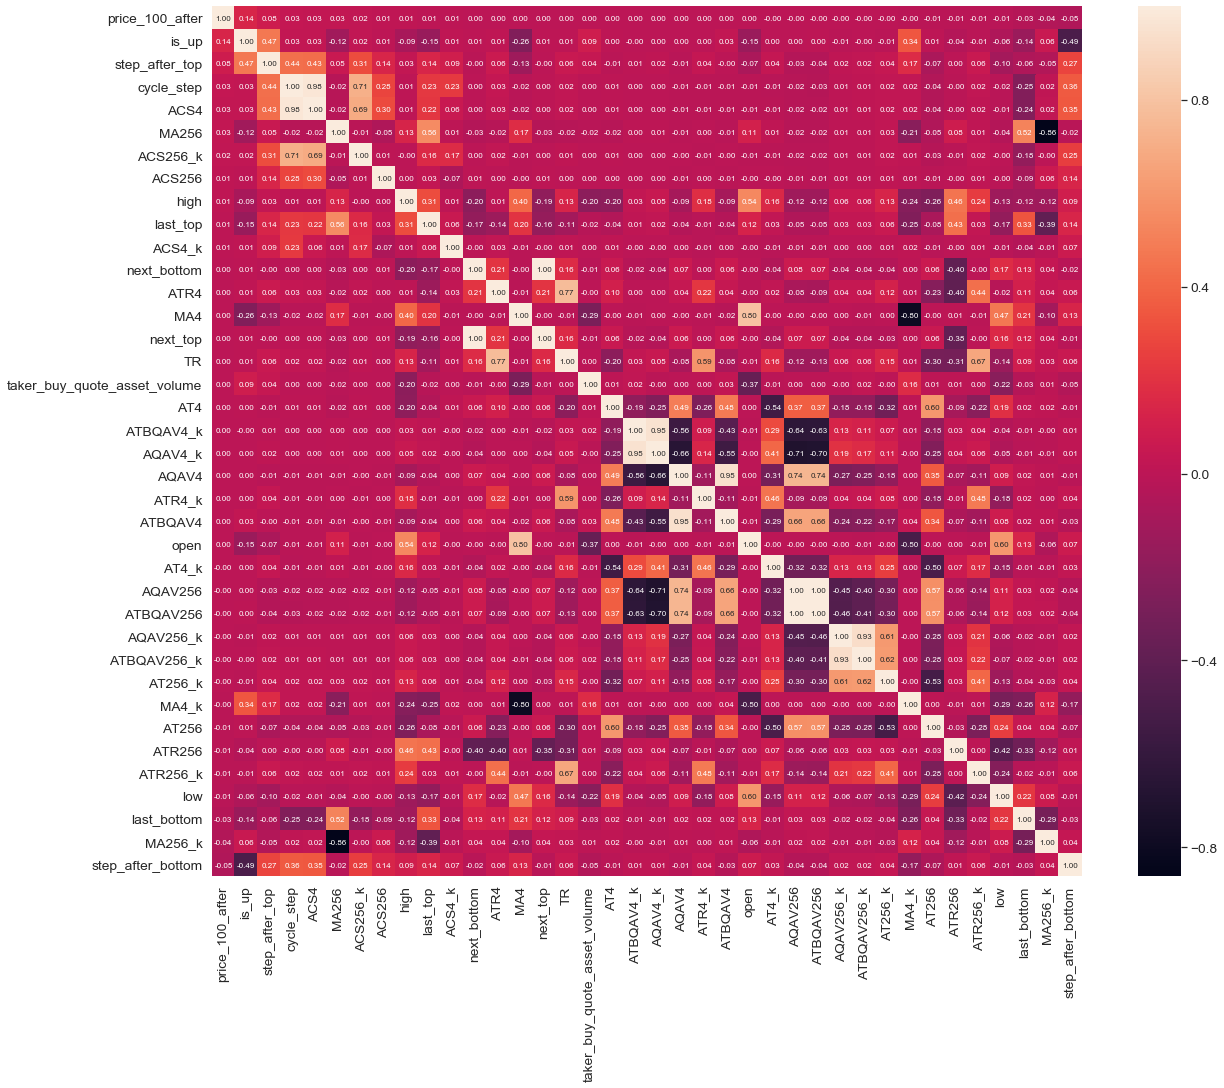

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

def heatmap(pd_data):
    corrmat = pd_data.corr()
    f, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(corrmat, vmax=.8, square=True)

def heatmap_font(pd_data, k=-1, target=target_name):
    # k is the number of variables for heatmap
    if k == -1:
        k = pd_data.shape[1]
        
    corrmat = pd_data.corr()
    f, ax = plt.subplots(figsize=(20, 16))
    cols = corrmat.nlargest(k, target)[target].index
    cm = np.corrcoef(pd_data[cols].values.T)
    sns.set(font_scale=1.25) # type: ignore
    hm = sns.heatmap(cm,
                     cbar=True,
                     annot=True,
                     square=True,
                     fmt='.2f',
                     annot_kws={'size': 8}, 
                     yticklabels=cols.values,
                     xticklabels=cols.values)
    plt.show()
    

# heatmap(full_buy)
# print(full_buy.shape[1])
heatmap_font(full_buy)